# DIAS Homework For Estimating the Value of pi

In [5]:
import numpy as np 
import time
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt 
%matplotlib notebook

## Using the Leibniz formula first and investigating the computation demands

<IPython.core.display.Javascript object>


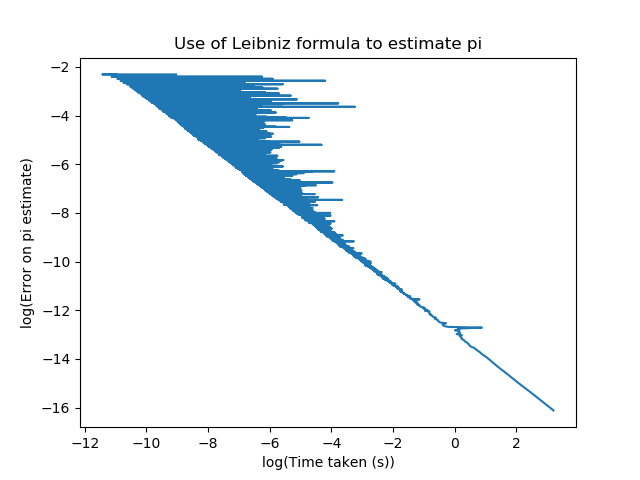

Text(0.5, 1.0, 'Use of Leibniz formula to estimate pi')

In [48]:
#First evaluating pi using Leibniz approximation formula 
#Function that returns time taken to calculate pi to specified degree of accuracy 
def pi_time(accuracy):
    pi_gen=0 #Initialise what will hold our generated value of pi 
    error = np.absolute(pi_gen-np.pi)  #Error between actual value and real value 
    iterations=0 #Keep track of necessary terms 

    #Start loop to get to wanted precision 
    tick=time.time() #Record time elapsed 

    while error>accuracy: 
        pi_gen += 4*((-1)**(iterations))*(1/(2*iterations +1)) #Using the Leibniz formula
        iterations+=1  #Keeping track of the iterations 
        error = np.absolute(pi_gen-np.pi)  #Reassign error

    tock=time.time()
    time_taken=tock-tick

    return time_taken


#Function that returns the iterations needed to calculate pi to specified accuracy
def pi_iterations(accuracy):
    pi_gen=0 #Initialise what will hold our generated value of pi 
    error = np.absolute(pi_gen-np.pi)  #Error between actual value and real value 
    iterations=0 #Keep track of necessary terms 

    while error>accuracy: 
        pi_gen += 4*((-1)**(iterations))*(1/(2*iterations +1)) #Using the Leibniz formula
        iterations+=1  #Keeping track of the iterations 
        error = np.absolute(pi_gen-np.pi)  #Reassign error

    return iterations

#Function that returns the iterations needed to calculate pi to specified accuracy
def pi_errors(accuracy):
    pi_gen=0 #Initialise what will hold our generated value of pi 
    error = np.absolute(pi_gen-np.pi)  #Error between actual value and real value 
    iterations=0 #Keep track of necessary terms 

    while error>accuracy: 
        pi_gen += 4*((-1)**(iterations))*(1/(2*iterations +1)) #Using the Leibniz formula
        iterations+=1  #Keeping track of the iterations 
        error = np.absolute(pi_gen-np.pi)  #Reassign error
    return error


#Graph plotting
precision=np.arange(0.1, 9e-8, -1e-7)
times=np.zeros(len(precision))
its=np.zeros(len(precision))
errs=np.zeros(len(precision))
for ii in range(len(precision)):
    times[ii]=pi_time(precision[ii])
    its[ii]=pi_iterations(precision[ii])
    errs[ii]=pi_errors(precision[ii])
    
plt.plot(np.log(times), np.log(errs))
plt.xlabel('log(Time taken (s))')
plt.ylabel('log(Error on pi estimate)')
plt.title('Use of Leibniz formula to estimate pi')

## Using Riemann sums to estimate the value of the integral of the Gaussian function

In [71]:
#Now evaulate by integrating a Gaussian function using Riemann sums
def gaussian(x):
    return np.exp(-x**2)

def riemann_integrate(lower_lim, upper_lim, spacing, function):
    #Create an array of wanted x values from positive to negative limit 
    xs=np.arange(lower_lim, upper_lim+spacing, spacing)

    #Integrate using a for loop 
    integral_sum=0
    for ii in range(len(xs)):
        integral_sum+=function(xs[ii])*spacing
        
    return integral_sum
        
#Return values 
#Choose spacing 
dx=0.01

#Investigate accuracy as limits are increased 
#Amount of terms we will consider
terms=100
#Create an array to track the times 
times=np.zeros(terms)
limits=np.linspace(1,1e4,terms)
pi_values=np.zeros(len(limits))
#Populate the pi values
for ii in tqdm(range(len(pi_values))):
    tick=time.time()
    pi_values[ii]=(riemann_integrate(-limits[ii], limits[ii], dx, gaussian))**2 #Using the standard integral result
    tock=time.time()
    times[ii]=tock-tick
    
#Calculate how far off each one is from pi value stored 
errors=np.absolute(np.pi-pi_values) 

<IPython.core.display.Javascript object>


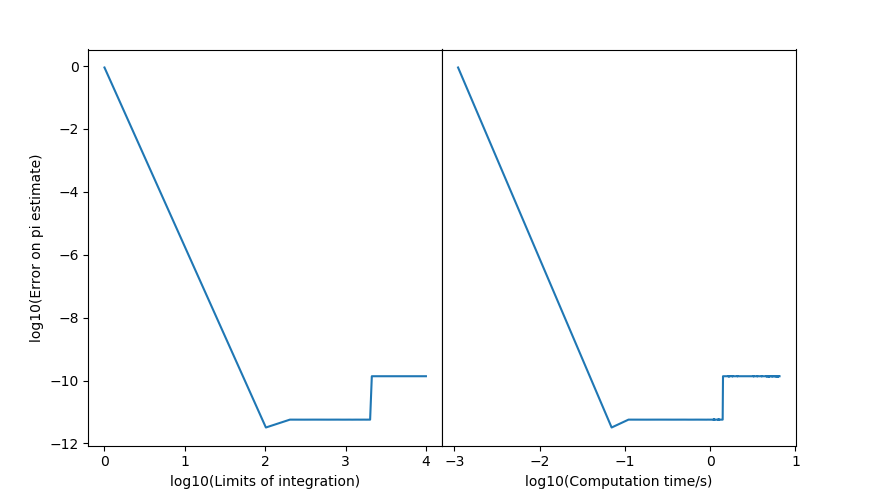

In [96]:
#Plot
fig = plt.figure()
ax1=fig.add_axes([0.1,0.1,0.4,0.8], xlabel='log10(Limits of integration)', ylabel='log10(Error on pi estimate)')
ax2=fig.add_axes([0.5,0.1,0.4,0.8], yticks=[], xlabel='log10(Computation time/s)')

ax1.plot(np.log10(limits), np.log10(errors))
ax2.plot(np.log10(times), np.log10(errors))

## Using the Monte Carlo method on a circle area to estimate pi

In [2]:
#Function that accepts amount of random points to be generated and returns estimatation of pi 
#using Monte Carlo
def monte_carlo_pi(points):
    points=int(points)
    #Randomly generate floats between (-1,1)
    xs=np.random.uniform(-1,1,[points,1])
    ys=np.random.uniform(-1,1,[points,1])

    #See how many terms lie within a circle of radius 1
    circle_terms=0
    for ii in range(points):
        if (xs[ii])**2 + (ys[ii])**2 < 1:
            circle_terms+=1
            
    #Calculate the ratio
    ratio=circle_terms/points 

    #Since total area is 4 from the square, pi is given by:
    pi_estimate=4*ratio
    
    return pi_estimate

#Generate a range of points 
range_points=np.linspace(1,1e6,1000)
pi_values=np.zeros(len(range_points))
times_monte=np.zeros(len(range_points))
for ii in tqdm(range(len(range_points))):
    tick=time.time()
    pi_values[ii]=monte_carlo_pi(range_points[ii])
    tock=time.time()
    times_monte[ii]=tock-tick

#Track errors 
monte_error=np.absolute(np.pi-pi_values)

<IPython.core.display.Javascript object>


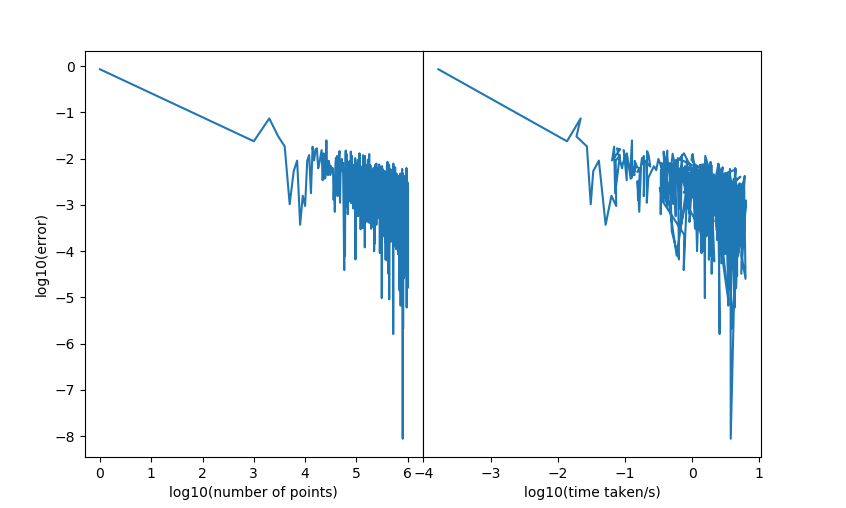

In [6]:
#Graphing
fig=plt.figure()
ax1=fig.add_axes([0.1,0.1,0.4,0.8], xlabel='log10(number of points)', ylabel='log10(error)')
ax2=fig.add_axes([0.5,0.1,0.4,0.8], yticks=[], xlabel='log10(time taken/s)')
ax1.plot(np.log10(range_points), np.log10(monte_error))
ax2.plot(np.log10(times_monte), np.log10(monte_error))